<a href="https://colab.research.google.com/github/Beatriz-Yun/AIFFEL_LMS/blob/main/Fundamental/%5BF-20%5D%EB%94%A5%EB%9F%AC%EB%8B%9D_%EB%A0%88%EC%9D%B4%EC%96%B4%EC%9D%98_%EC%9D%B4%ED%95%B4(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 학습 목표
- 레이어의 개념을 이해한다.
- 딥러닝 모델 속 각 레이어(Linear, Convolution)의 동작 방식을 이해한다.
- 데이터의 특성을 고려한 레이어를 설계하고, 이를 Tensorflow로 정의하는 법을 배운다.



---

딥러닝은 $y = Wx + by=Wx+b$ 에서 최적의 $W$(Weight)과 $b$를 찾는 과정이다!

딥러닝을 이해하는 방법 중 가장 쉬운 방법은 데이터의 형태 변화를 좆는 것이다.

하나의 물체가 여러 개의 논리적인 객체들로 계층적 구성되어 있는 경우, 이러한 각각의 객체를 하나의 레이어(layer)라 한다.

<br>

신경망의 Weight라고 하는 것은 사실 layer의 Weight이다.<br>
신경망은 레이어들의 각기 다른 Weight가 유기적으로 연결되어 이뤄내는 하나의 결과물이다.

# Linear 레이어

이제 각각의 레이어가 어떤 특징을 가지며, 어떻게 쓰이면 좋은지 알아보자.

<br>

Fully Connected Layer, Feedforward Neural Network, Multilayer Perceptrons, Dense Layer 등 다양한 이름으로 불리지만 그 모든 것들은 결국 'Linear 레이어'에 해당한다.

<br>

'Linear 레이어'는 선형대수학에서 쓰이는 용어 중 **선형 변환(Linear Transform)**과 완전히 동일한 기능을 하는 레이어이다. <br>
선형 변환을 활용해 **데이터를 특정 차원으로 변환**하는 기능을 한다.
고차원으로 변환한다면 데이터를 더 풍부하게 표현하는 효과가 있고, 저차원으로 변환한다면 데이터를 집약시키는 효과가 있다.

[행렬과 선형변환(feat.마인크래프트 스티브) Linear Transformation](https://youtu.be/vVvjYzFBUVk)

<br>

'Linear 레이어'는 (입력의 차원, 출력의 차원)에 해당하는 Weight를 가지는 특성을 가지고 있다.



In [2]:
import tensorflow as tf

batch_size = 64
boxes = tf.zeros((batch_size, 4, 2))     # Tensorflow는 Batch를 기반으로 동작하기에,
                                         # 우리는 사각형 2개 세트를 batch_size개만큼
                                         # 만든 후 처리를 하게 됩니다.
print("1단계 연산 준비:", boxes.shape)

first_linear = tf.keras.layers.Dense(units=1, use_bias=False) 
# units은 출력 차원 수를 의미합니다.
# Weight 행렬 속 실수를 인간의 뇌 속 하나의 뉴런 '유닛' 취급을 하는 거죠!

first_out = first_linear(boxes)
first_out = tf.squeeze(first_out, axis=-1) # (4, 1)을 (4,)로 변환해줍니다.
                                           # (불필요한 차원 축소)

print("1단계 연산 결과:", first_out.shape)
print("1단계 Linear Layer의 Weight 형태:", first_linear.weights[0].shape)

print("\n2단계 연산 준비:", first_out.shape)

second_linear = tf.keras.layers.Dense(units=1, use_bias=False)
second_out = second_linear(first_out)
second_out = tf.squeeze(second_out, axis=-1)

print("2단계 연산 결과:", second_out.shape)
print("2단계 Linear Layer의 Weight 형태:", second_linear.weights[0].shape)

1단계 연산 준비: (64, 4, 2)
1단계 연산 결과: (64, 4)
1단계 Linear Layer의 Weight 형태: (2, 1)

2단계 연산 준비: (64, 4)
2단계 연산 결과: (64,)
2단계 Linear Layer의 Weight 형태: (4, 1)


In [3]:
import tensorflow as tf

batch_size = 64
boxes = tf.zeros((batch_size, 4, 2))

print("1단계 연산 준비:", boxes.shape)

first_linear = tf.keras.layers.Dense(units=3, use_bias=False)
first_out = first_linear(boxes)

print("1단계 연산 결과:", first_out.shape)
print("1단계 Linear Layer의 Weight 형태:", first_linear.weights[0].shape)

print("\n2단계 연산 준비:", first_out.shape)

second_linear = tf.keras.layers.Dense(units=1, use_bias=False)
second_out = second_linear(first_out)
second_out = tf.squeeze(second_out, axis=-1)

print("2단계 연산 결과:", second_out.shape)
print("2단계 Linear Layer의 Weight 형태:", second_linear.weights[0].shape)

print("\n3단계 연산 준비:", second_out.shape)

third_linear = tf.keras.layers.Dense(units=1, use_bias=False)
third_out = third_linear(second_out)
third_out = tf.squeeze(third_out, axis=-1)

print("3단계 연산 결과:", third_out.shape)
print("3단계 Linear Layer의 Weight 형태:", third_linear.weights[0].shape)

total_params = \
first_linear.count_params() + \
second_linear.count_params() + \
third_linear.count_params()

print("총 Parameters:", total_params)

1단계 연산 준비: (64, 4, 2)
1단계 연산 결과: (64, 4, 3)
1단계 Linear Layer의 Weight 형태: (2, 3)

2단계 연산 준비: (64, 4, 3)
2단계 연산 결과: (64, 4)
2단계 Linear Layer의 Weight 형태: (3, 1)

3단계 연산 준비: (64, 4)
3단계 연산 결과: (64,)
3단계 Linear Layer의 Weight 형태: (4, 1)
총 Parameters: 13


이런 방법들로 Weight의 형태만 선언해주면 그 파라미터 값을 임의의 실수가 채우고, 수많은 데이터를 거치며 가장 적합한 Weight를 알아서 찾아가는 과정이 바로 훈련(Training)이다. 적합한 파라미터라는 것은 주어진 데이터가 가지는 분포에 따라 결정된다.

편향이 없다면 파라미터를 아무리 돌리고 늘리고 해도 정확하게 근사할 수 없다.

단순히 생각해서 원점을 평행이동하는 것만으로도 해결할 수 있기 때문에 실제로 편향은 선형변환된 값에 편향 파라미터 $b$를 더해주는 것으로 표현한다.

$Wx$에 단순히 더하기 때문에 편향 값은 형태가 (선형변환 결과 차원, )인 한 줄짜리 Weight로 정의된다.

# Convolution 레이어

Convolution 연산이라는 것은 딥러닝 외적으로도 많이 사용되는 개념이다.

사진 필터가 Convolution 연산을 활용한 대표적인 예이다.<br>
사진을 선명하게 하는 필터, 흐리게 하는 필터 등 다양한 필터들이 Convolution을 위한 행렬로 정의되어 있다
[Convolutions](https://aishack.in/tutorials/image-convolution-examples/)

<br>

Convolution연산을 수행하면, 이미지와 필터가 겹치는 부분의 값을 서로 곱한 후 그 값을 모두 더해서 새로운 이미지의 한 픽셀값이 된다.<br>
- 이미지를 필터로 훑을 때, 한 칸씩 이동하며 훑을 수도 있지만, 두 칸, 세 칸씩 이동하며 훑을 수도 있다. 그것을 결정하는 값을 **Stride**라고 칭한다.
- Convolution 연산이 입력의 형태를 변형시킨다. **Padding**으로 입력의 테두리에 일정값을 추가해 입력의 형태를 유지한다. 또한 edge의 정보를 더 잘 이용할 수 있다.

<br>

목적에 도움이 되는 정보는 선명하게, 그렇지 않은 정보는 흐리게 만드는 필터를 훈을 통해 찾아주는 것이 Convolution 레이어가 하는 일이다. 심지어 하나의 필터가 아니라 수십 개의 필터를 중첩한다. 이를 통해 Convolution 레이어가 **(필터의개수 x 필터의가로 x 필터의세로)크기의 Weight**를 갖는다는 사실을 알 수 있다.


In [4]:
import tensorflow as tf

batch_size = 64
pic = tf.zeros((batch_size, 1920, 1080, 3))

print("입력 이미지 데이터:", pic.shape)
conv_layer = tf.keras.layers.Conv2D(filters=16,
                                    kernel_size=(5, 5),
                                    strides=5,
                                    use_bias=False)
conv_out = conv_layer(pic)

print("\nConvolution 결과:", conv_out.shape)
print("Convolution Layer의 Parameter 수:", conv_layer.count_params())

flatten_out = tf.keras.layers.Flatten()(conv_out)
print("\n1차원으로 펼친 데이터:", flatten_out.shape)

linear_layer = tf.keras.layers.Dense(units=1, use_bias=False)
linear_out = linear_layer(flatten_out)

print("\nLinear 결과:", linear_out.shape)
print("Linear Layer의 Parameter 수:", linear_layer.count_params())

입력 이미지 데이터: (64, 1920, 1080, 3)

Convolution 결과: (64, 384, 216, 16)
Convolution Layer의 Parameter 수: 1200

1차원으로 펼친 데이터: (64, 1327104)

Linear 결과: (64, 1)
Linear Layer의 Parameter 수: 1327104


# Pooling 레이어

이전 스텝에서 우리는 Convolution 레이어가 이미지 입력을 처리할 때 Linear 레이어 대비 훨씬 적은 파라미터로 훨씬 효과적으로 중요한 이미지 피처를 뽑아낼 수 있음을 알 수 있었다.

<br>

Linear 레이어는 입력 피처 전체가 매 출력에 미치는 영향의 가중치를 모든 입력 피처 사이에 전부 고려한다. 이미지처럼 지역성(Locality) 그 자체가 엄청나게 중요한 정보가 되는 경우, Linear 레이어는 그 중요한 정보가 모두 소실된 채 엄청나게 큰 파라미터 속에서 입력과 출력 사이의 관계 가중치를 찾아내야 하는 어려운 문제를 풀어야 한다.

<br>

반면 Convolution 레이어는 필터 구조 안에 Locality 정보가 온전히 보존된다. 인접한 픽셀들 사이에서의 패턴만 추출할 수 있다는 것 자체만으로도 불필요한 파라미터 및 연산량을 제거하고 훨씬 정확하고 효율적으로 정보를 집약시킬 수 있게 된다.

그러나 Convolution 레이어만으로 객체를 판별하기엔 2가지 문제가 있다.

1. 이미지 크기에 비해 **필터 크기가 너무 작으면** object detection을 위한 유의미한 정보를 담아낼 수 없다.
2. stride로 파라미터를 줄이는 효과는 발생하지만 찾고자 하는 object가 필터 경계선에 걸려서 인식하지 못할 우려가 있다.

이 문제를 해결하기 위해 필터 사이즈를 키우게 되면 파라미터 사이즈와 연산량이 커질 뿐 아니라, accuracy도 떨어지게 될 가능성이 높다.
- 만약 극단적으로 필터 사이즈를 이미지 사이즈와 동일하게 한다면, Linear레이어와 같아진다.


<br>

### Receptive Field (수용영역)
이 문제를 해결하기 위해선 필터 사이즈가 아니라 receptive field를 크게 해야 한다.<br>
신경망의 출력부가 충분한 정보를 얻기 위해 커버하는 **입력 데이터의 receptive field가 충분히 커서 그 안에 detect해야할 object의 특성이 충분히 포함**되어 있어야 정확한 detection이 가능하게 되기 때문이다. <br>
어쩌면 receptive field의 크기는 거의 이미지 크기 전체가 되는 경우도 있을 수 있다.

## Max Pooling 레이어의 효과

**1. translational invariance 효과**

이미지는 약간의 상하좌우 이동이 생겨도, Max Pooling을 통해 인접한 영역 중 가장 특징이 두드러진 영역 하나를 뽑기 때문에 약간의 시프트 효과에도 동일한 특징을 안정적으로 잡아낼 수 있는 긍정적 효과가 있다. 덕분에 object 위치에 대한 오버피팅을 방지하고 안정적인 특징 추출 효과를 가져온다.

<br>

**2. 비선형 함수와 동일한 특징 추출 효과**

ReLu와 같은 비선형 함수와 마찬가지로 많은 하위 레이어의 연산 결과를 무시하는 효과를 발생시키지만, 그 결과 중요한 피처만을 상위 레이어로 추출해서 올려줌으로써 결과적으로 분류기의 성능을 증진시키는 효과를 가진다.

<br>

**3. Receptive Field 극대화 효과**

Max Pooling이 없이도 Receptive Field를 크게 하려면 Convolutional 레이어를 아주 많이 쌓아야 한다. 그 결과 큰 파라미터 사이즈로 인한 오버피팅, 연산량 증가, Gradient Vanishing 등의 문제를 감수해야 한다. 이런 문제를 효과적으로 해결하는 방법으로 꼽히는 두 가지 중 하나가 Max Pooling 레이어 사용이다. 다른 하나로는 Dilated Convolution이 있습니다.

[receptive field(수용영역, 수용장)과 dilated convolution(팽창된 컨볼루션)](https://m.blog.naver.com/sogangori/220952339643)

# Deconvolution 레이어
Convolution의 결과를 역재생해서 원본 이미지와 최대한 유사한 정보를 복원해 내는 Auto Encoder에 대해 알아보자.

우선 MNIST 데이터셋을 입력으로 받아 그대로 복원하는 Auto Encoder를 아래와 같이 만들어 보겠습니다. 순서는 다음과 같습니다.
- 패키지 임포트 및 MNIST 데이터셋 로딩
- AutoEncoder 모델 구성
- AutoEncoder 모델 훈련
- AutoEncoder Reconstruction Test

In [5]:
import numpy as np
from tensorflow.python.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.datasets import mnist
import json
import matplotlib.pyplot as plt #for plotting

# MNIST 데이터 로딩
(x_train, _), (x_test, _) = mnist.load_data()    # y_train, y_test는 사용하지 않습니다.

x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

11493376/11490434 [==============================] - 0s 0us/step


Encoder 레이어에서 주의할 점은 Conv2D 레이어는 shape를 변화시키지 않고 있다는 점입니다.<br>
Output shape를 변화시키는 것은 오롯이 MaxPooling2D 레이어의 역할입니다.<br>
그래서 Encoder를 통과한 직후의 Output은 4 X 4 의 shape가 되어 있습니다.<br><br>

Decoder 레이어를 보면 Conv2D 레이어와 UpSampling2D 레이어를 거쳐 최종적으로 28 X 28 사이즈의 출력이 나옵니다.<br>
여기서도 shape를 변화시키는 것은 UpSampling2D 뿐입니다.

In [6]:
# AutoEncoder 모델 구성 - Input 부분
input_shape = x_train.shape[1:]
input_img = Input(shape=input_shape)

# AutoEncoder 모델 구성 - Encoder 부분
encode_conv_layer_1 = Conv2D(16, (3, 3), activation='relu', padding='same')
encode_pool_layer_1 = MaxPooling2D((2, 2), padding='same')
encode_conv_layer_2 = Conv2D(8, (3, 3), activation='relu', padding='same')
encode_pool_layer_2 = MaxPooling2D((2, 2), padding='same')
encode_conv_layer_3 = Conv2D(4, (3, 3), activation='relu', padding='same')
encode_pool_layer_3 = MaxPooling2D((2, 2), padding='same')

encoded = encode_conv_layer_1(input_img)
encoded = encode_pool_layer_1(encoded)
encoded = encode_conv_layer_2(encoded)
encoded = encode_pool_layer_2(encoded)
encoded = encode_conv_layer_3(encoded)
encoded = encode_pool_layer_3(encoded)

# AutoEncoder 모델 구성 - Decoder 부분
decode_conv_layer_1 = Conv2D(4, (3, 3), activation='relu', padding='same')
decode_upsample_layer_1 = UpSampling2D((2, 2))
decode_conv_layer_2 = Conv2D(8, (3, 3), activation='relu', padding='same')
decode_upsample_layer_2 = UpSampling2D((2, 2))
decode_conv_layer_3 = Conv2D(16, (3, 3), activation='relu')
decode_upsample_layer_3 = UpSampling2D((2, 2))
decode_conv_layer_4 = Conv2D(1, (3, 3), activation='sigmoid', padding='same')

decoded = decode_conv_layer_1(encoded)   # Decoder는 Encoder의 출력을 입력으로 받습니다.
decoded = decode_upsample_layer_1(decoded)
decoded = decode_conv_layer_2(decoded)
decoded = decode_upsample_layer_2(decoded)
decoded = decode_conv_layer_3(decoded)
decoded = decode_upsample_layer_3(decoded)
decoded = decode_conv_layer_4(decoded)

# AutoEncoder 모델 정의
autoencoder = Model(input_img, decoded)
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 4)           292       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 4)           0     

AutoEncoder를 훈련시킨다.<br>
(y_train이 들어가야 할 자리에 x_train이 들어가 있음을 유의)

loss로 주로 분류 모델에서 사용되는 binary_crossentropy를 사용해서 다소 의아할 것입니다. 그러나 모든 dim에서 0~1 사이의 값을 가지는 입력 데이터와 출력 데이터(마지막 출력이 sigmoid로 제어되고 있음에 유의합시다) 사이의 분포가 최대한 유사하기를 바라기 때문에 이 loss는 타당합니다.

In [7]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 5s 9ms/step - loss: 0.6706 - val_loss: 0.6684
Epoch 2/50
235/235 [==============================] - 2s 8ms/step - loss: 0.6655 - val_loss: 0.6624
Epoch 3/50
235/235 [==============================] - 2s 8ms/step - loss: 0.6586 - val_loss: 0.6544
Epoch 4/50
235/235 [==============================] - 2s 7ms/step - loss: 0.6491 - val_loss: 0.6435
Epoch 5/50
235/235 [==============================] - 2s 7ms/step - loss: 0.6363 - val_loss: 0.6287
Epoch 6/50
235/235 [==============================] - 2s 8ms/step - loss: 0.6191 - val_loss: 0.6091
Epoch 7/50
235/235 [==============================] - 2s 8ms/step - loss: 0.5968 - val_loss: 0.5847
Epoch 8/50
235/235 [==============================] - 2s 8ms/step - loss: 0.5708 - val_loss: 0.5586
Epoch 9/50
235/235 [==============================] - 2s 7ms/step - loss: 0.5462 - val_loss: 0.5375
Epoch 10/50
235/235 [==============================] - 2s 7ms/step - loss: 0.5287 - val_loss: 0.5248

훈련이 끝난 후, 실제로 우리가 만든 AutoEncoder가 MNIST 이미지를 제대로 생성하는지를 확인해 봅니다. 결과가 썩 만족스럽지는 않습니다. 하지만 동일한 Decoder 네트워크 구조를 가지고도 Variational Autoencoder나 DCGAN 등은 훨씬 훌륭한 이미지를 생성하기 때문에, 이것은 Decoder 네트워크 구조만의 문제는 아닐 것입니다.

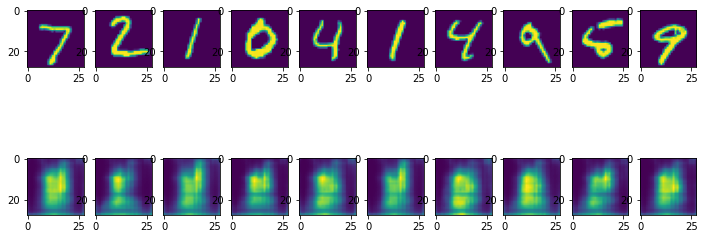

In [8]:
x_test_10 = x_test[:10]       # 테스트 데이터셋에서 10개만 골라서
x_test_hat = autoencoder.predict(x_test_10)    # AutoEncoder 모델의 이미지 복원생성
x_test_imgs = x_test_10.reshape(-1, 28, 28)
x_test_hat_imgs = x_test_hat.reshape(-1, 28, 28)

plt.figure(figsize=(12,5))  # 이미지 사이즈 지정
for i in range(10):  
    # 원본이미지 출력
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test_imgs[i])
    # 생성된 이미지 출력
    plt.subplot(2, 10, i+11)
    plt.imshow(x_test_hat_imgs[i])

## Decoder Layers for Reconstruction

Decoder에서 이미지 복원을 위해 사용했던 Convolution 레이어는 실은 Encoder에서 사용했던 것과 동일한 레이어였습니다. 크기도 변하지 않은 채 채널 개수만 2배로 늘리고 있는 것입니다. 어쨌거나 Convolution 레이어를 거쳐 정보가 집약되는 것이 아니라 오히려 정보량이 많아지고 있습니다.

<br>

엄밀히 말해, 이것은 Convolution의 수학적 역연산으로서의 Deconvolution과는 다릅니다. 오히려 정방향의 Convolution 연산을 통해 원본 이미지와 가까운 이미지를 재생해 내는 효과를 구현한 것입니다.

하지만 Convolution을 통해 Output shape가 줄어드는 것이 얼마든지 가능하듯, 늘어나는 것도 얼마든지 가능합니다. 단지 우리의 AutoEncoder 구조가 얼마나 정보손실 없이 원본 데이터를 잘 압축하고 있느냐에 따라 Decoder가 뽑아낼 수 있는 최종적인 이미지의 퀄리티가 결정됩니다.

<br>

하지만 Image Reconstruction을 위해서 일반적으로 많이 사용하는 Transposed Convolution을 방금 활용한 것은 아닙니다. 오히려 방금은 Convolution 레이어를 활용해서 Transposed Convolution를 흉내 낸 것에 불과합니다.

## Upsampling 레이어
Max pooling 레이어를 통해 Downsampling을 시도해 왔다면, 이제 Upsampling 레이어를 통해 그 반대 작업을 수행하게 됩니다.

크게는 3가지 방법이 있습니다
- Nearest Neighbor : 복원해야 할 값을 가까운 값으로 복제한다.
- Bed of Nails : 복원해야 할 값을 0으로 처리한다.
- Max Unpooling : Max Pooling 때 버린 값을 실은 따로 기억해 두었다가 그 값으로 복원한다.

우리는 위에서 파라미터를 별도로 주지 않았으므로 디폴트인 Nearest Neighbor로 복원하였습니다.
[Deconvolution](https://analysisbugs.tistory.com/104)

### Transposed Convolution
우리는 위에서 Transposed Convolution을 활용하지는 않았습니다. 만약 활용했다면 모델 구조는 아래와 같이 될 것입니다.

[Up-sampling with Transposed Convolution](https://zzsza.github.io/data/2018/06/25/upsampling-with-transposed-convolution/)

In [9]:
from tensorflow.python.keras.layers import Conv2DTranspose

# Conv2DTranspose를 활용한  AutoEncoder 모델
# AutoEncoder 모델 구성 - Input 부분
input_shape = x_train.shape[1:]
input_img = Input(shape=input_shape)

# AutoEncoder 모델 구성 - Encoder 부분
encode_conv_layer_1 = Conv2D(16, (3, 3), activation='relu')
encode_pool_layer_1 = MaxPooling2D((2, 2))
encode_conv_layer_2 = Conv2D(8, (3, 3), activation='relu')
encode_pool_layer_2 = MaxPooling2D((2, 2))
encode_conv_layer_3 = Conv2D(4, (3, 3), activation='relu')

encoded = encode_conv_layer_1(input_img)
encoded = encode_pool_layer_1(encoded)
encoded = encode_conv_layer_2(encoded)
encoded = encode_pool_layer_2(encoded)
encoded = encode_conv_layer_3(encoded)

# AutoEncoder 모델 구성 - Decoder 부분  - 
decode_conv_layer_1 = Conv2DTranspose(4, (3, 3), activation='relu', padding='same')
decode_upsample_layer_1 = UpSampling2D((2, 2))
decode_conv_layer_2 = Conv2DTranspose(8, (3, 3), activation='relu', padding='same')
decode_upsample_layer_2 = UpSampling2D((2, 2))
decode_conv_layer_3 = Conv2DTranspose(16, (3, 3), activation='relu')
decode_upsample_layer_3 = UpSampling2D((2, 2))
decode_conv_layer_4 = Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')

decoded = decode_conv_layer_1(encoded)   # Decoder는 Encoder의 출력을 입력으로 받습니다.
decoded = decode_upsample_layer_1(decoded)
decoded = decode_conv_layer_2(decoded)
decoded = decode_upsample_layer_2(decoded)
decoded = decode_conv_layer_3(decoded)
decoded = decode_upsample_layer_3(decoded)
decoded = decode_conv_layer_4(decoded)

# AutoEncoder 모델 정의
autoencoder = Model(input_img, decoded)
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 8)         1160      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 8)           0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 3, 3, 4)           292       
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 3, 3, 4)           148 